In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
d=pd.read_csv('insurance.csv')
d

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# no null values

In [6]:
d.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# no outlier in age, bmi, chidren

In [8]:
d_float=list(d.select_dtypes(float).columns)
d_float

['bmi', 'charges']

In [9]:
d_int=list(d.select_dtypes(int).columns)
d_int

['age', 'children']

In [10]:
d.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [11]:
d_cat=list(d.select_dtypes(object).columns)
d_cat

['sex', 'smoker', 'region']

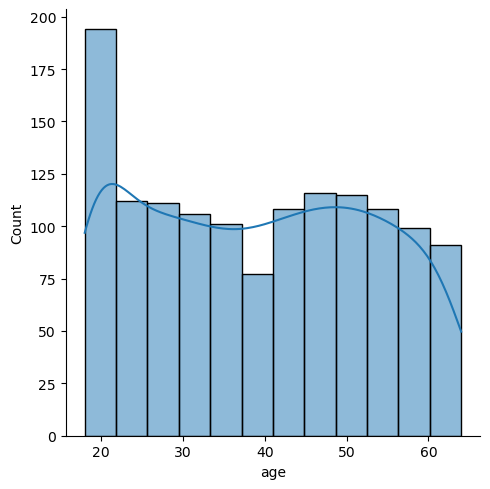

In [12]:
# unvarience 

sns.displot(x='age', data=d, kde=True)

<Axes: xlabel='smoker', ylabel='count'>

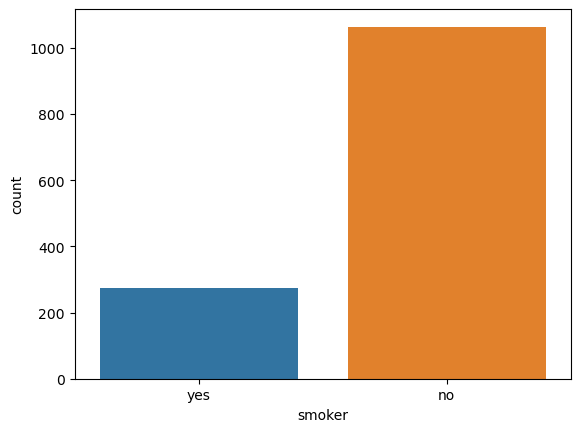

In [13]:
sns.countplot(x='smoker', data=d)

<Axes: xlabel='region', ylabel='count'>

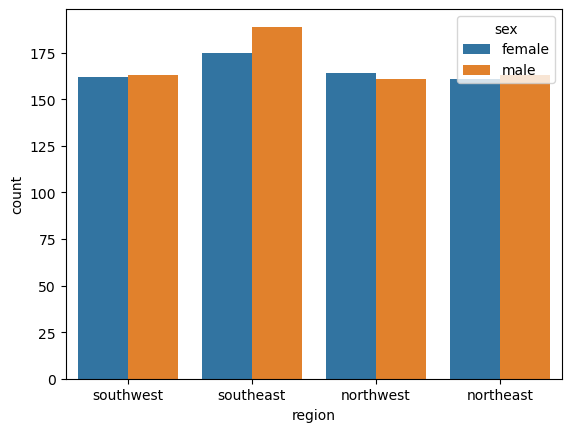

In [14]:
sns.countplot(x='region',hue='sex', data=d)

<Axes: xlabel='children', ylabel='count'>

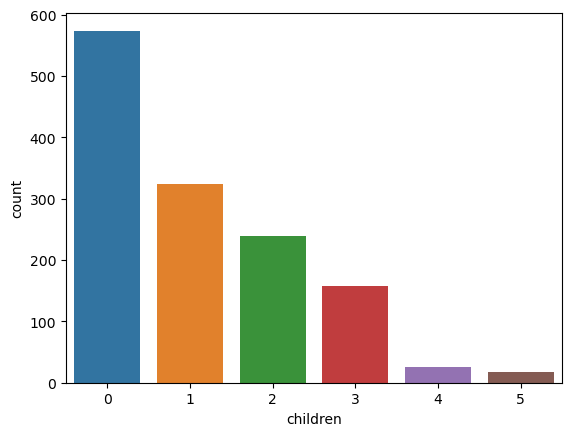

In [15]:
sns.countplot(x='children', data=d)

<Axes: xlabel='sex', ylabel='count'>

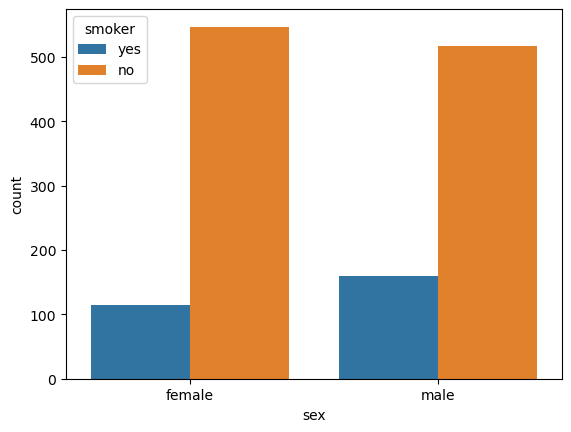

In [16]:
sns.countplot(x='sex', data=d, hue='smoker')

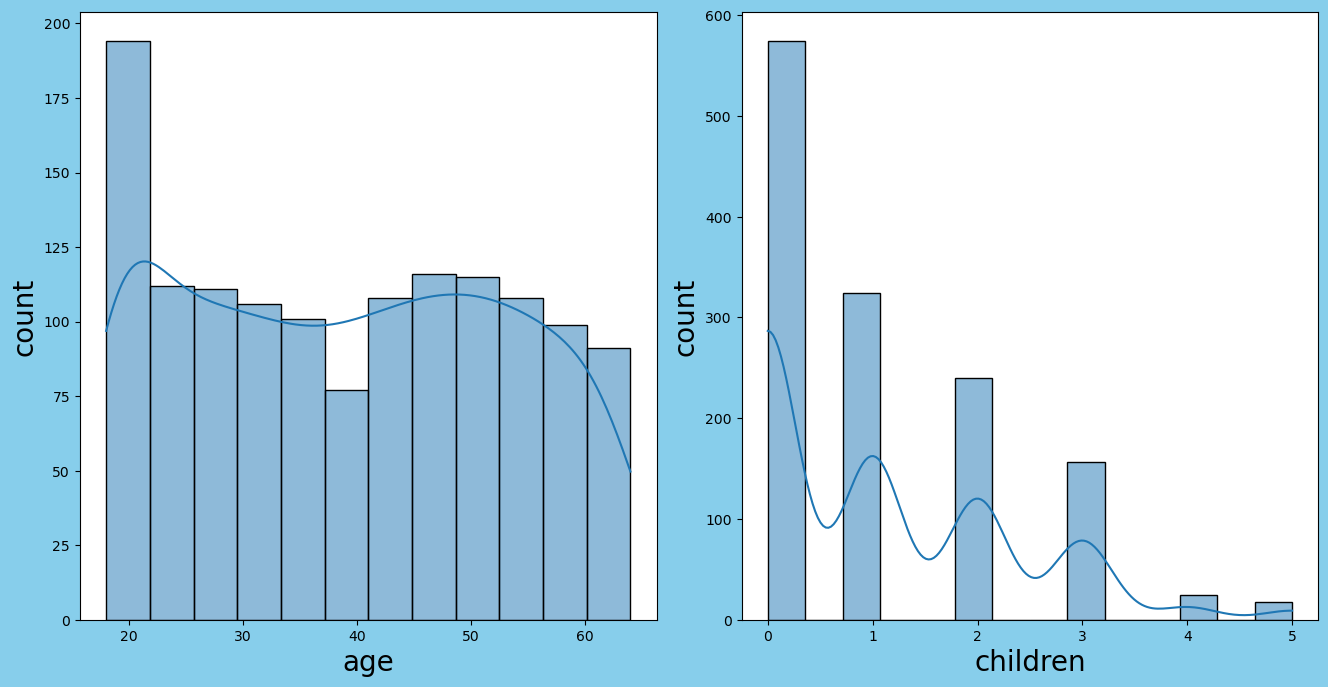

In [17]:
plt.figure(figsize=(20,20), facecolor='skyblue')
plot=1

for columns in d_int:
    if plot<=2:
        ax=plt.subplot(3,3,plot)
        sns.histplot(d[columns], kde=True)
        plt.xlabel(columns,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plot+=1
plt.tight_layout()

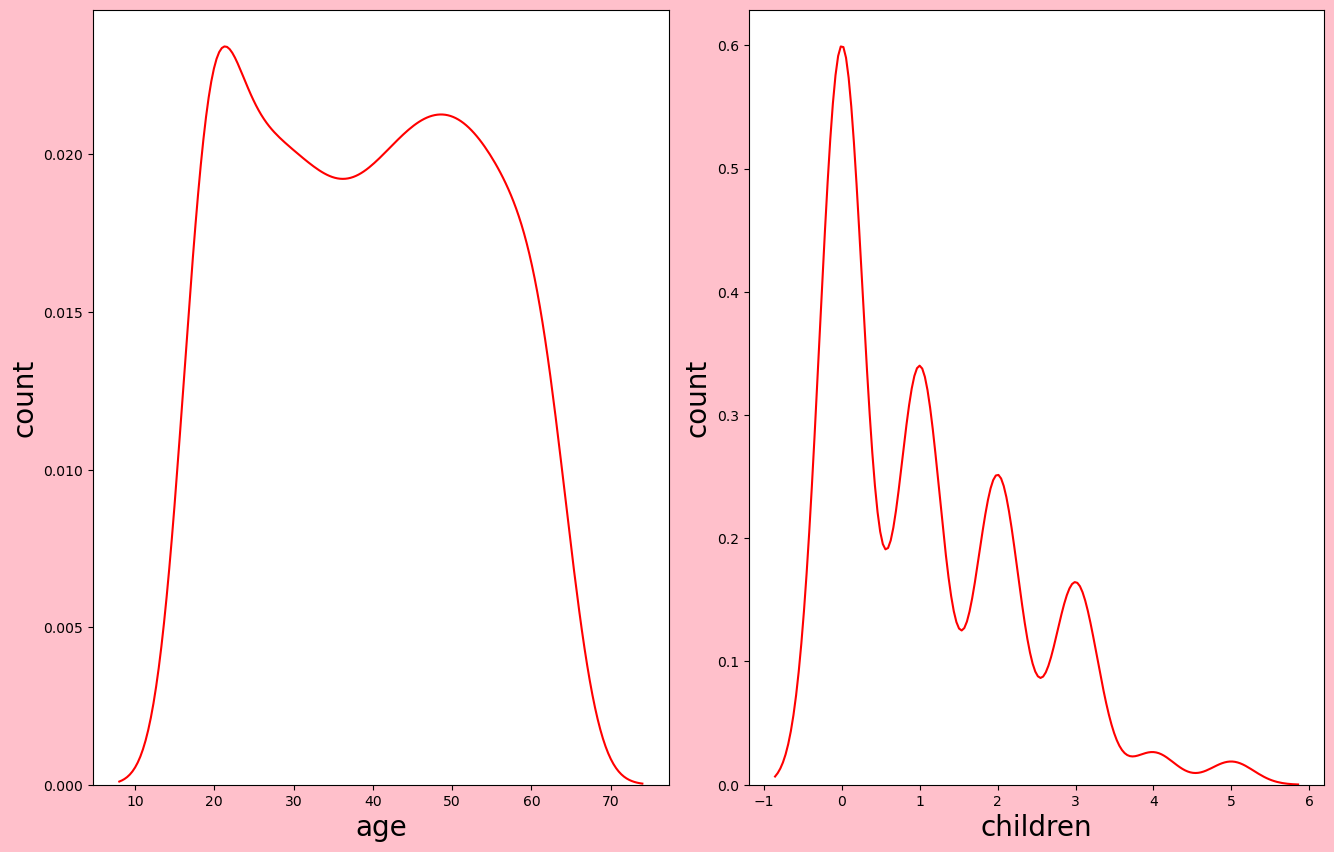

In [18]:
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber=1

for column in d_int:
    if plotnumber<=2:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(d[column],hist=False,color='r')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

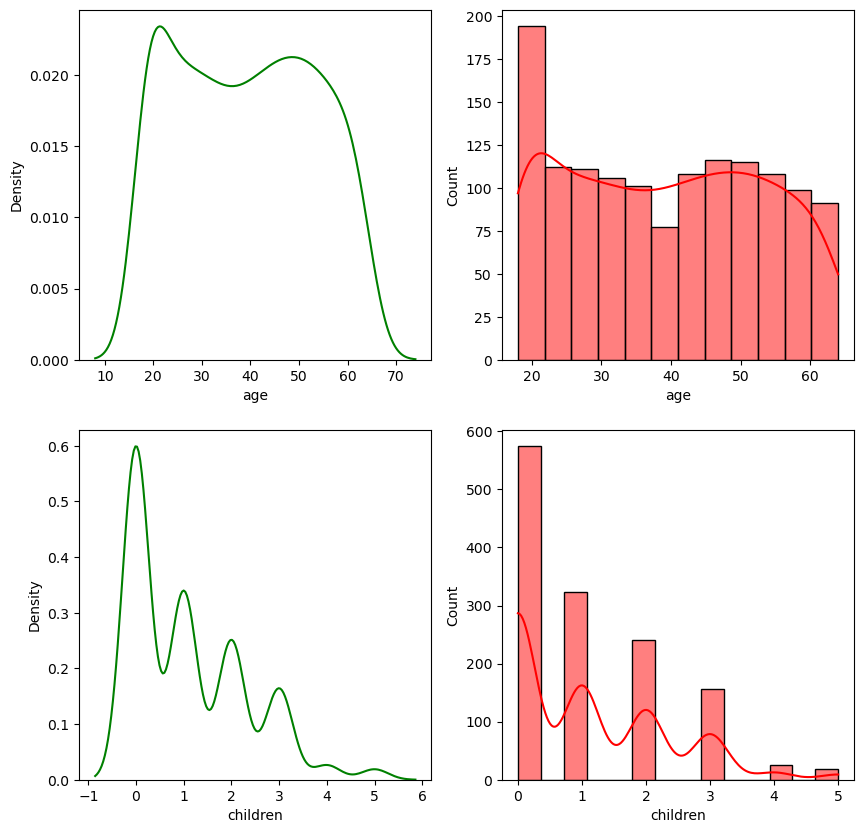

In [19]:
fig,ax=plt.subplots(2,2, figsize=(10,10))
m,n=0,0

for column in d_int:
    sns.distplot(d[column],hist=False,color='g',ax=ax[m][n])
    sns.histplot(d[column],kde=True,color='r',ax=ax[m][n+1])
    m+=1

    

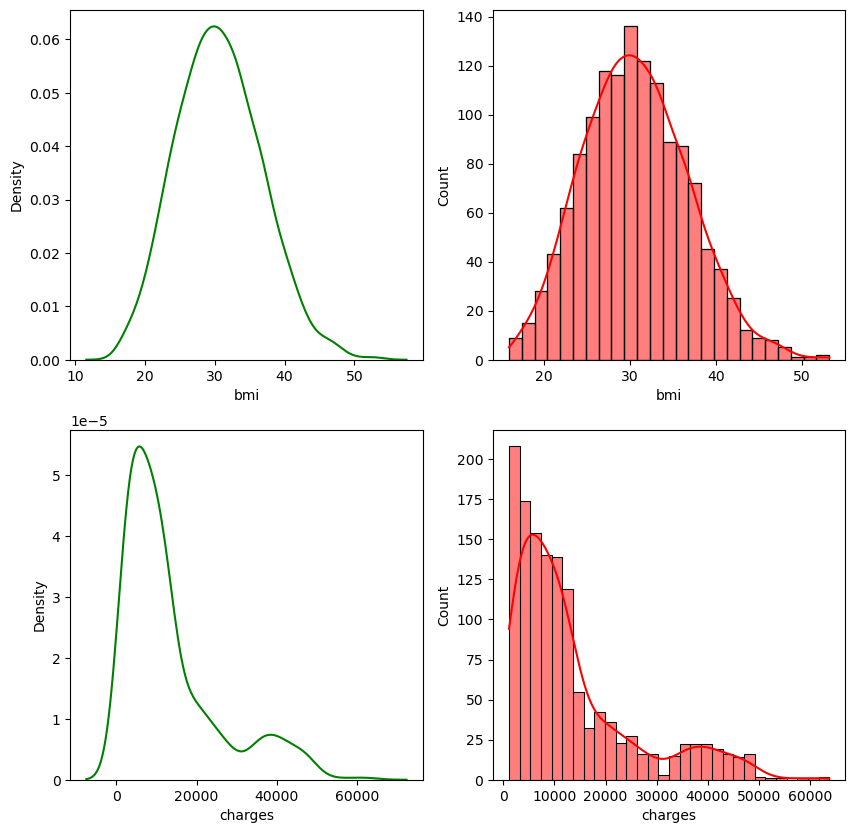

In [20]:
fig,ax=plt.subplots(2,2, figsize=(10,10))
m,n=0,0

for column in d_float:
    sns.distplot(d[column],hist=False,color='g',ax=ax[m][n])
    sns.histplot(d[column],kde=True,color='r',ax=ax[m][n+1])
    m+=1


<Axes: xlabel='age', ylabel='bmi'>

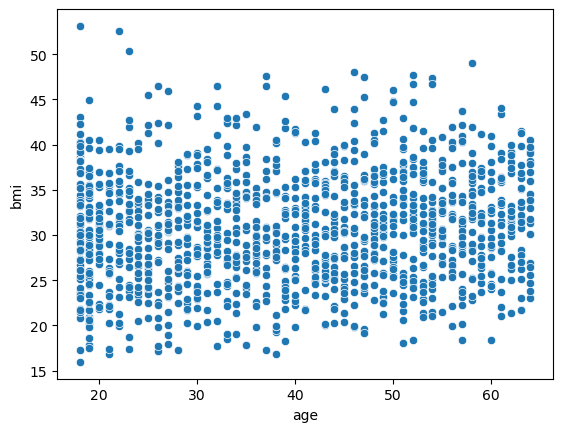

In [21]:
sns.scatterplot(x='age', y='bmi', data=d )

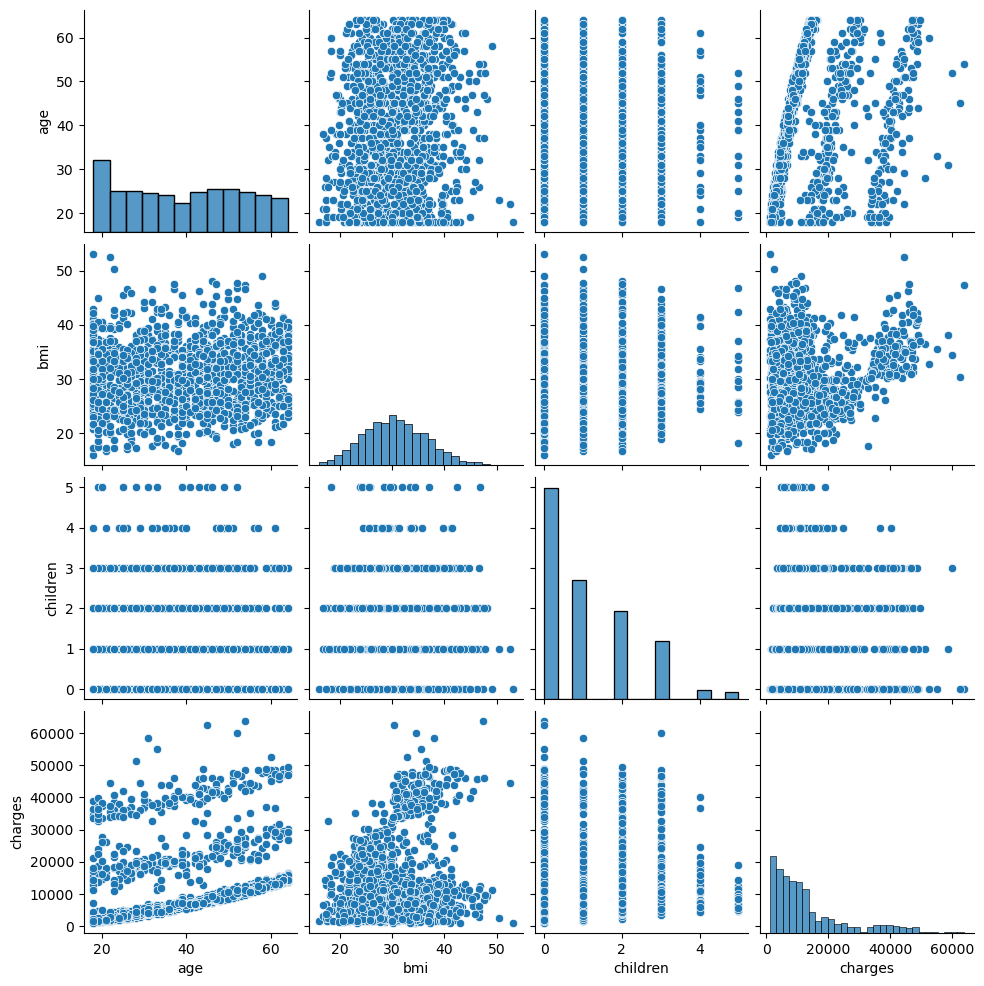

In [22]:
sns.pairplot(data=d)

In [23]:
d.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

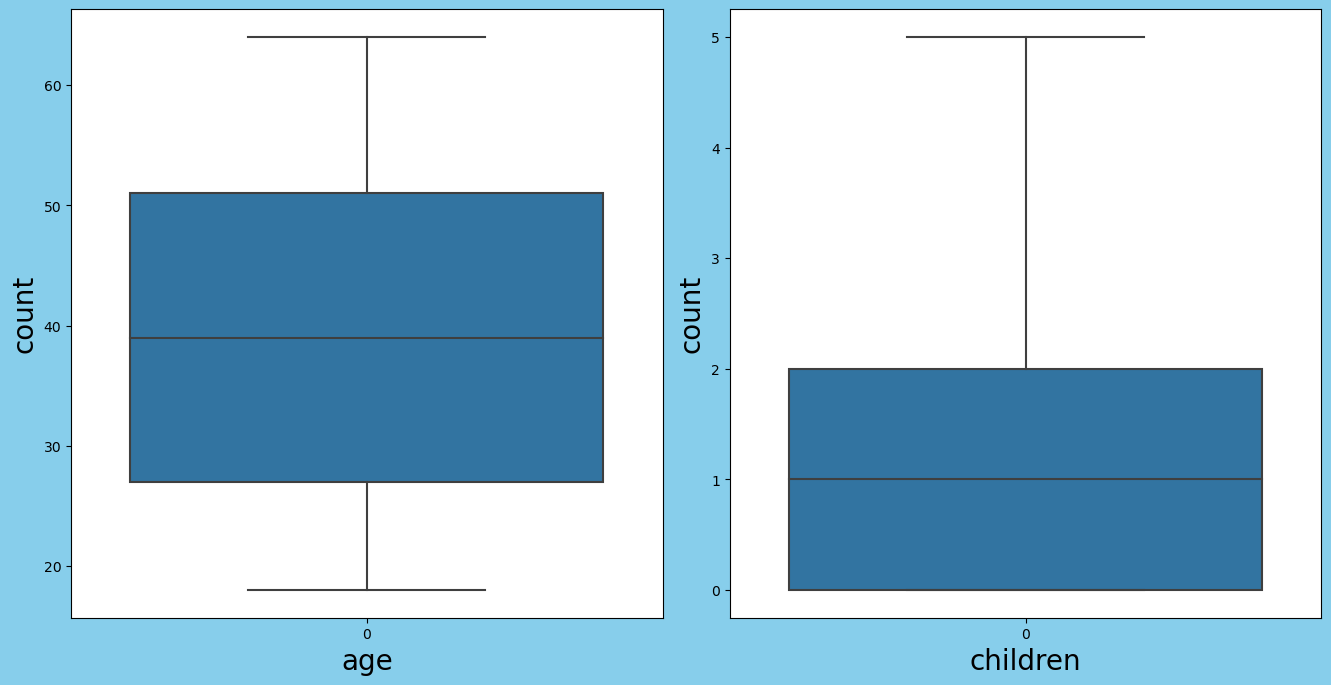

In [24]:
plt.figure(figsize=(20,20), facecolor='skyblue')
plot=1

for columns in d_int:
    if plot<=2:
        ax=plt.subplot(3,3,plot)
        sns.boxplot(d[columns])
        plt.xlabel(columns,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plot+=1
plt.tight_layout()

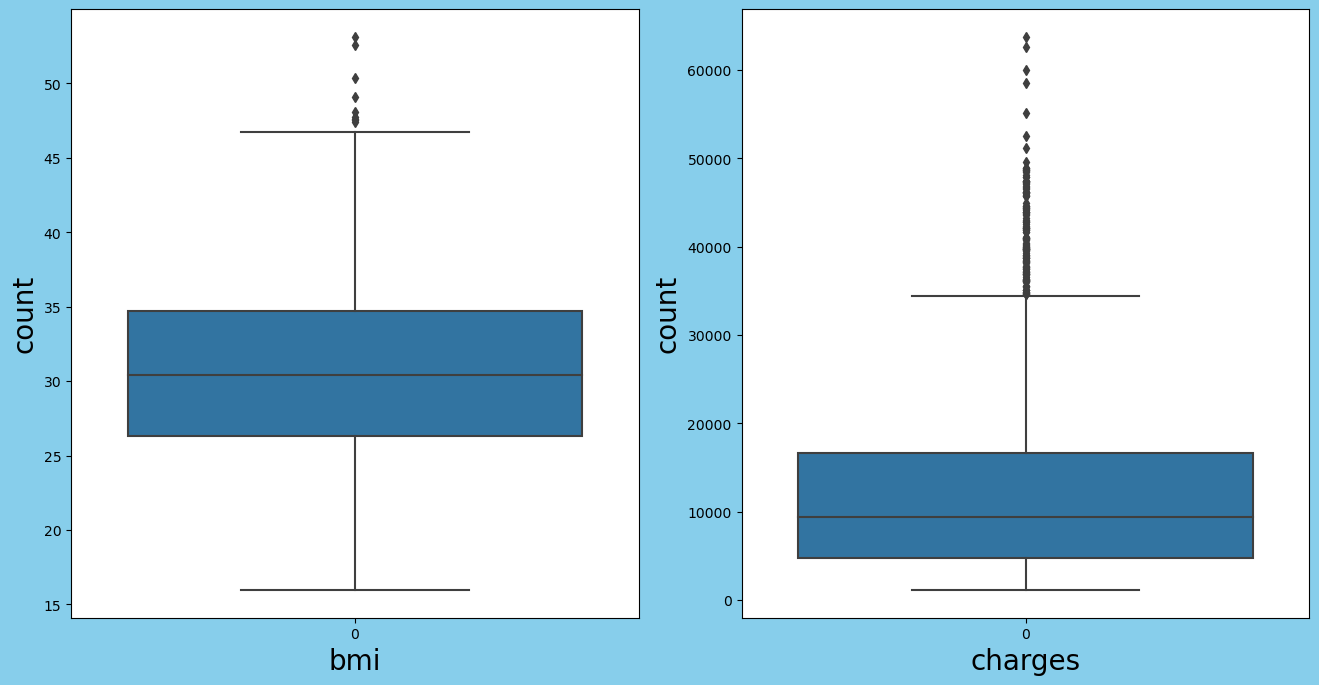

In [25]:
plt.figure(figsize=(20,20), facecolor='skyblue')
plot=1

for columns in d_float:
    if plot<=2:
        ax=plt.subplot(3,3,plot)
        sns.boxplot(d[columns])
        plt.xlabel(columns,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plot+=1
plt.tight_layout()



In [26]:
upperlimit=d['bmi'].mean()+3*d['bmi'].std()
lowerlimit=d['bmi'].mean()-3*d['bmi'].std()
print('Upper Limit:', upperlimit)
print('Lower Limit:', lowerlimit)

Upper Limit: 48.957957596023604
Lower Limit: 12.368836125949496


In [27]:
d.loc[d['bmi']> upperlimit]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [28]:
d.loc[d['bmi']< lowerlimit]

,age,sex,bmi,children,smoker,region,charges


In [29]:
da=d.loc[d['bmi']< upperlimit]

In [30]:
upper_limit=da['bmi'].mean()+3*da['bmi'].std()
lower_limit=da['bmi'].mean()-3*da['bmi'].std()
print('Upper Limit:', upper_limit)
print('Lower Limit:', lower_limit)

Upper Limit: 48.60433723356962
Lower Limit: 12.598773710958117


In [31]:
da.loc[da['bmi']> upperlimit]

,age,sex,bmi,children,smoker,region,charges


In [32]:
da.loc[da['bmi']< lowerlimit]

,age,sex,bmi,children,smoker,region,charges


In [33]:
da

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [34]:
da['sex'].replace({'male':0, 'female':1}, inplace=True)

In [35]:
da['smoker'].replace({'no':0, 'yes':1}, inplace=True)

In [36]:
da

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [37]:
reg=pd.get_dummies(da['region'],dtype=int)

In [38]:
da=da.join(reg)

In [39]:
da

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,0,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,0,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,0,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,0,28.880,0,0,northwest,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,northeast,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,southeast,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,southwest,2007.94500,0,0,0,1


In [40]:
dat=da.drop('region', axis=1).corr()
dat

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,0.019041,0.118887,0.042345,-0.023820,0.301360,0.001398,-0.001495,-0.008570,0.008961
sex,0.019041,1.000000,-0.037031,-0.018667,-0.076096,-0.057165,0.000750,0.009494,-0.012331,0.002508
bmi,0.118887,-0.037031,1.000000,0.018054,0.002264,0.200799,-0.134834,-0.132623,0.258964,-0.000467
children,0.042345,-0.018667,0.018054,1.000000,0.007087,0.067569,-0.023670,0.023994,-0.020740,0.021098
smoker,-0.023820,-0.076096,0.002264,0.007087,1.000000,0.786536,0.003008,-0.036837,0.068342,-0.036837
charges,0.301360,-0.057165,0.200799,0.067569,0.786536,1.000000,0.006597,-0.039826,0.073863,-0.043143
northeast,0.001398,0.000750,-0.134834,-0.023670,0.003008,0.006597,1.000000,-0.321446,-0.344337,-0.321446
northwest,-0.001495,0.009494,-0.132623,0.023994,-0.036837,-0.039826,-0.321446,1.000000,-0.345039,-0.322101
southeast,-0.008570,-0.012331,0.258964,-0.020740,0.068342,0.073863,-0.344337,-0.345039,1.000000,-0.345039
southwest,0.008961,0.002508,-0.000467,0.021098,-0.036837,-0.043143,-0.321446,-0.322101,-0.345039,1.000000


<Axes: >

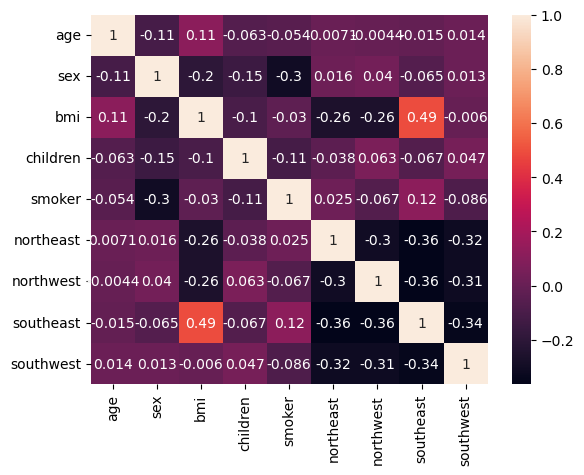

In [41]:
sns.heatmap(dat.drop('charges', axis=1).corr(),annot=True)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
import math

In [43]:
x=da.drop(['charges','region'], axis=1)
y=da['charges']

In [44]:
x

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,1,0,0
1334,18,1,31.920,0,0,1,0,0,0
1335,18,1,36.850,0,0,0,0,1,0
1336,21,1,25.800,0,0,0,0,0,1


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [46]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predict=lr.predict(x_test)
y_predict

array([ 8289.58992217,  6940.2159345 , 10452.99917191, 10337.89140847,
       26120.57460541,  2151.19504548,  4862.01300164, 13476.11940147,
       11390.3493673 , 36282.22866963, 10374.10279517, 13793.91827403,
        4873.1721372 , 17177.58593603, 11028.96647161,  7375.09796613,
       10412.23247071, 31968.20632555,  6485.03047249,  4880.27776079,
        3182.95022531,  7980.58415949, 14638.40753459, 13587.88854087,
       33354.67976368,  5630.57407676, 11521.85830998,  3902.6954224 ,
       14968.83351918,  5277.39038218, 10533.94063346,  6271.62078836,
        1160.69912466,  7043.10485034, 11563.26731103,  6639.61268242,
        4379.23314416,  4027.46421767,  8538.259969  , 10757.3405224 ,
        7245.87662982, 30934.20848546, 11203.70514341,  5338.01672497,
       12980.13636668,  3053.96115386,  3890.01123283, 13774.38480429,
        4376.46705738,  8637.87213841, 15319.26288712, 11608.76931504,
        2915.1011285 , 27049.43842737, 10680.90377157, 36567.16024102,
      

In [47]:
r2=r2_score(y_test,y_predict)
r2

0.7813224819415816

In [48]:
x_test.shape

(267, 9)

In [49]:
x_train.shape

(1067, 9)

In [50]:
ad=1-(1-0.78)*(267-9)/(267-9-1)
ad

0.7791439688715953

In [51]:
print(mean_squared_error(y_test,y_predict))

35391294.89179874


In [52]:
print(math.sqrt(mean_squared_error(y_test,y_predict)))

5949.058319751012


In [56]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=2)
model.fit(x_train,y_train)
y_pred=mode.predict(x_test)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.